In [101]:
# Import libraries
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import urllib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn.metrics import mean_squared_error

In [24]:
# Upload daily minimum temperatures in Melbourne dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url)

In [25]:
data.columns

Index(['Date', 'Temp'], dtype='object')

In [26]:
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [27]:
# Split into training and test datasets
train_data = data.iloc[1:-365]
test_data = data.iloc[-365:]

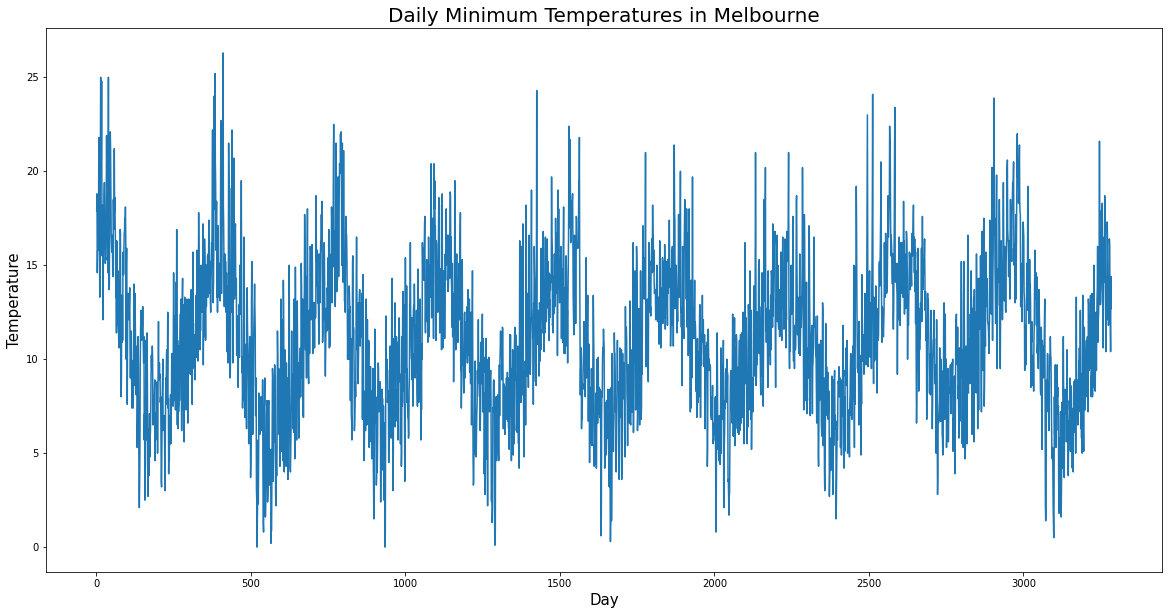

In [28]:
fig = plt.figure(figsize=(20, 10))
plt.xlabel('Day', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.title('Daily Minimum Temperatures in Melbourne', fontsize=20)
plt.plot(train_data.index, train_data['Temp'], ls='-')

In [29]:
train_data.describe()

,Temp
count,3284.000000
mean,11.120189
std,4.088650
min,0.000000
25%,8.200000
50%,11.000000
75%,13.900000
max,26.300000


Text(0.5, 1.0, 'Histogram of Daily Minimum Temperatures in Melbourne')

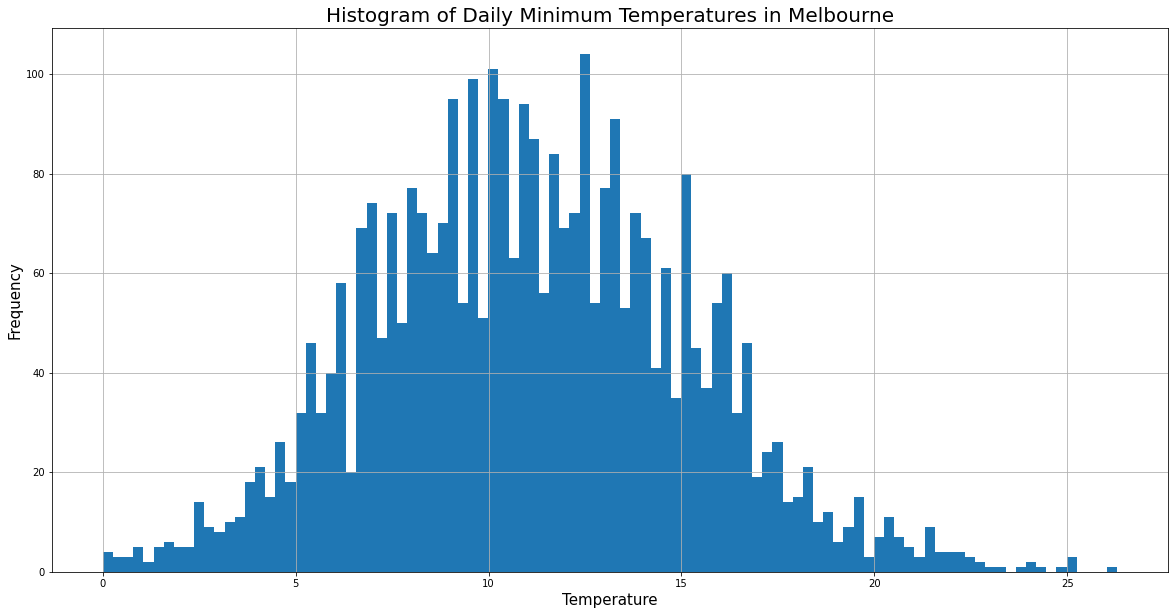

In [30]:
train_data['Temp'].hist(bins=100, figsize=(20, 10))
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Daily Minimum Temperatures in Melbourne', fontsize=20)

Text(0.5, 1.0, 'Autocorrelation Plot')

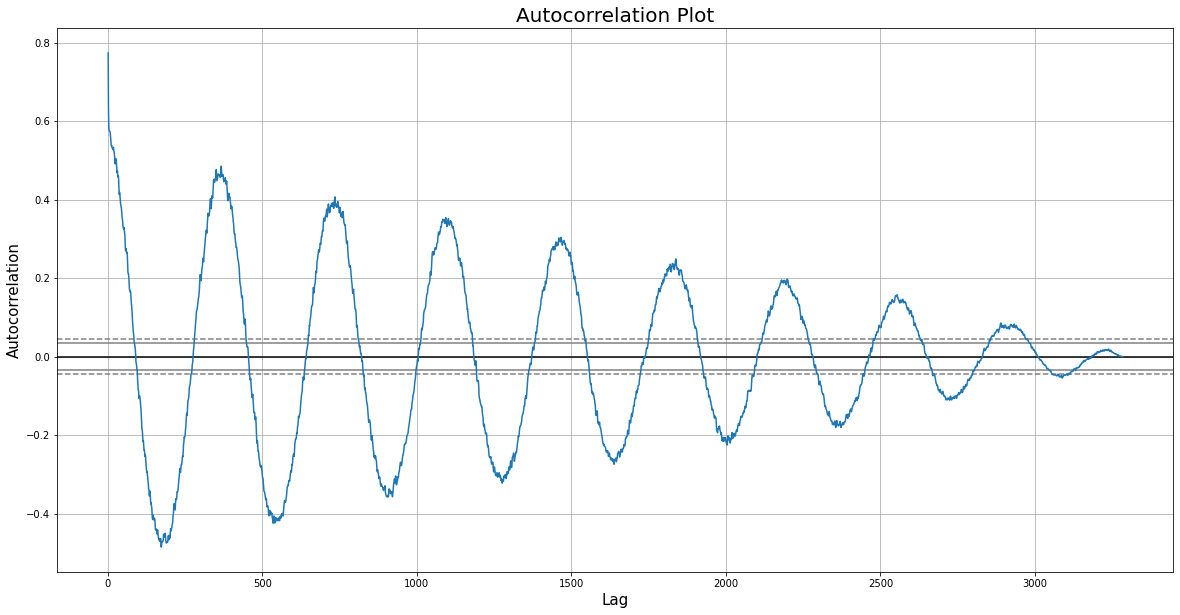

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))
autocorrelation_plot(train_data['Temp'], ax=ax)
plt.xlabel('Lag', fontsize=15)
plt.ylabel('Autocorrelation', fontsize=15)
plt.title('Autocorrelation Plot', fontsize=20)

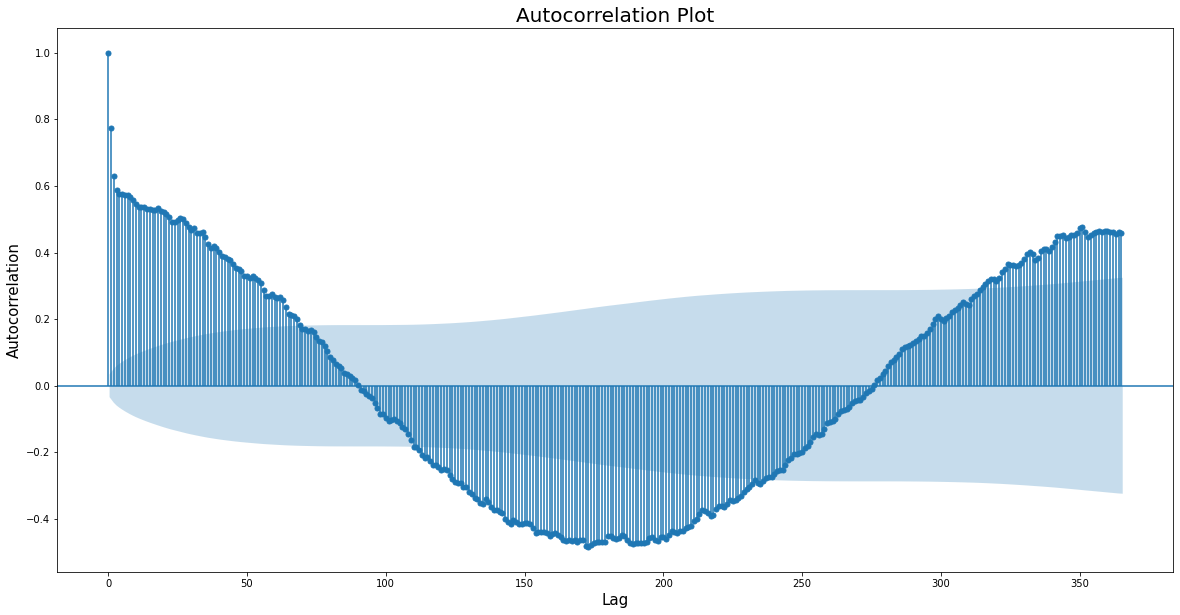

In [72]:
fig, ax = plt.subplots(figsize=(20, 10))
sm.graphics.tsa.plot_acf(train_data['Temp'], lags=365, ax=ax)
plt.xlabel('Lag', fontsize=15)
plt.ylabel('Autocorrelation', fontsize=15)
plt.title('Autocorrelation Plot', fontsize=20)
plt.show()

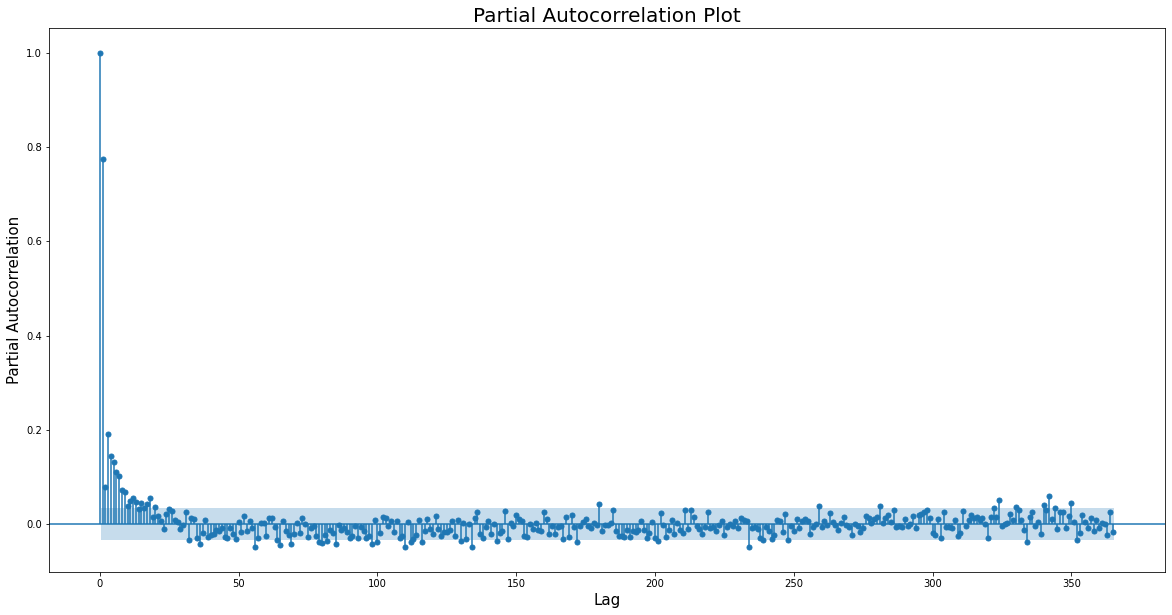

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))
sm.graphics.tsa.plot_pacf(train_data['Temp'], lags=365, ax=ax)
plt.xlabel('Lag', fontsize=15)
plt.ylabel('Partial Autocorrelation', fontsize=15)
plt.title('Partial Autocorrelation Plot', fontsize=20)
plt.show()

In [64]:
adfuller_results = sm.tsa.stattools.adfuller(train_data['Temp'], maxlag=365, regression='c', autolag=None, regresults=False)
adfuller_results

(-1.6917020685100237,
 0.4353928123110505,
 365,
 2918,
 {'1%': -3.4325929958530335,
  '5%': -2.862531006064522,
  '10%': -2.56729754031722})

In [65]:
temp_diff_1 = train_data['Temp'].diff()[1:]
temp_diff_1

2       0.9
3      -4.2
4       1.2
5       0.0
6       0.0
       ... 
3280   -2.7
3281   -1.6
3282   -1.3
3283    4.0
3284   -1.7
Name: Temp, Length: 3283, dtype: float64

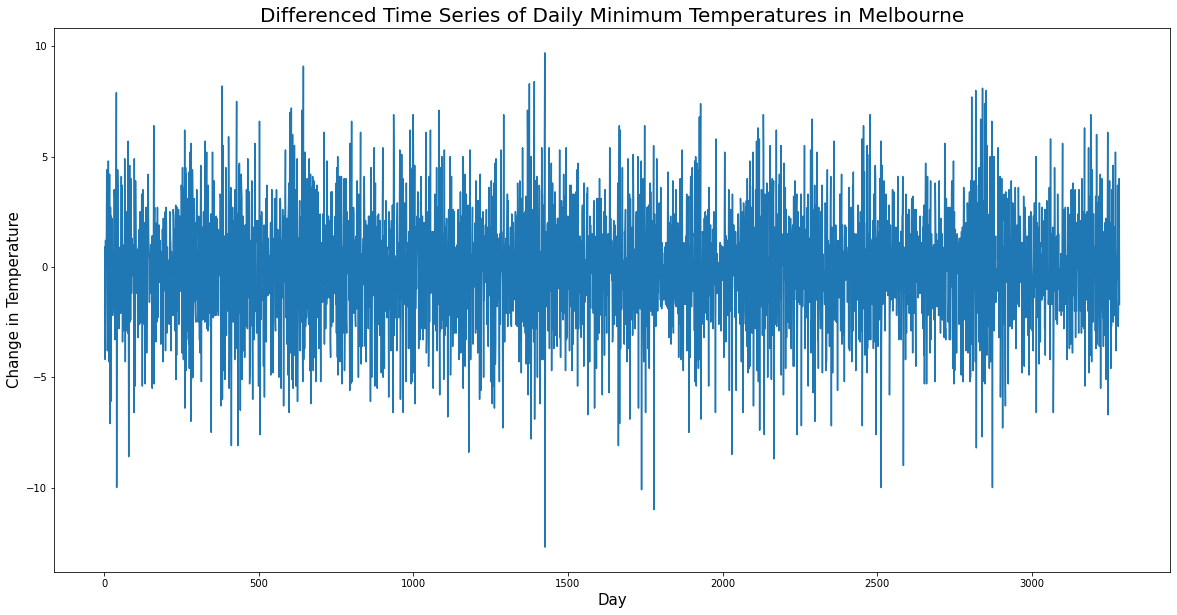

In [34]:
fig = plt.figure(figsize=(20, 10))
plt.xlabel('Day', fontsize=15)
plt.ylabel('Change in Temperature', fontsize=15)
plt.title('Differenced Time Series of Daily Minimum Temperatures in Melbourne', fontsize=20)
plt.plot(temp_diff_1.index, temp_diff_1)

In [35]:
temp_diff_1.describe()

count    3283.000000
mean       -0.001584
std         2.747642
min       -12.700000
25%        -1.700000
50%         0.200000
75%         1.800000
max         9.700000
Name: Temp, dtype: float64

<AxesSubplot:title={'center':'Autocorrelation Plot for Differenced Time Series'}, xlabel='Lag', ylabel='Autocorrelation'>

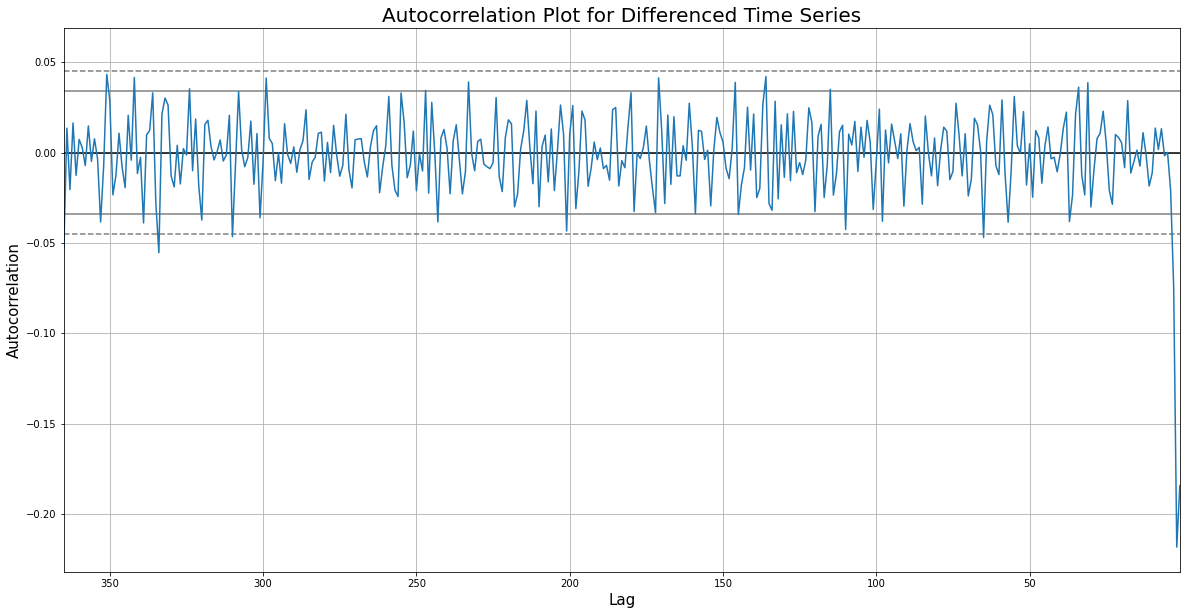

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(365)
plt.xlabel('Lag', fontsize=15)
plt.ylabel('Autocorrelation', fontsize=15)
plt.title('Autocorrelation Plot for Differenced Time Series', fontsize=20)
autocorrelation_plot(temp_diff_1, ax=ax)

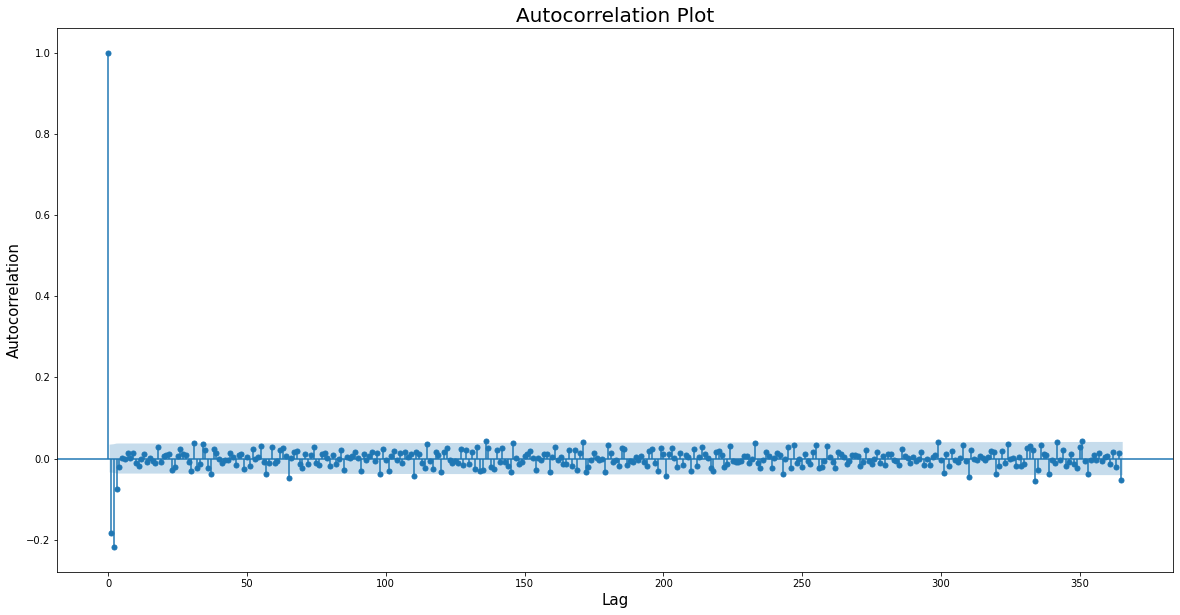

In [66]:
fig, ax = plt.subplots(figsize=(20, 10))
sm.graphics.tsa.plot_acf(temp_diff_1, lags=365, ax=ax)
plt.xlabel('Lag', fontsize=15)
plt.ylabel('Autocorrelation', fontsize=15)
plt.title('Autocorrelation Plot', fontsize=20)
plt.show()

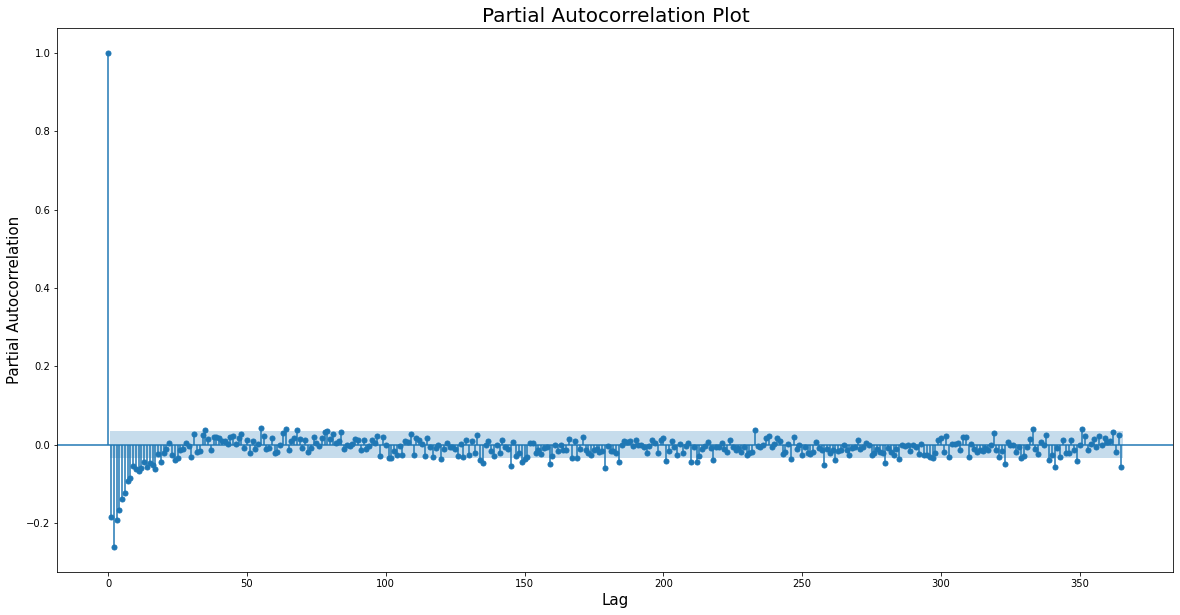

In [68]:
fig, ax = plt.subplots(figsize=(20, 10))
sm.graphics.tsa.plot_pacf(temp_diff_1, lags=365, ax=ax)
plt.xlabel('Lag', fontsize=15)
plt.ylabel('Partial Autocorrelation', fontsize=15)
plt.title('Partial Autocorrelation Plot', fontsize=20)
plt.show()

In [37]:
sm.tsa.stattools.adfuller(temp_diff_1, maxlag=365, regression='nc', autolag=None, regresults=False)

(-7.9651100782682684,
 3.941617999092463e-13,
 365,
 2917,
 {'1%': -2.566506898663268,
  '5%': -1.9410924751158694,
  '10%': -1.6167292654875114})

In [ ]:
temp_diff_1_365 = temp_diff_1.diff(365).dropna()

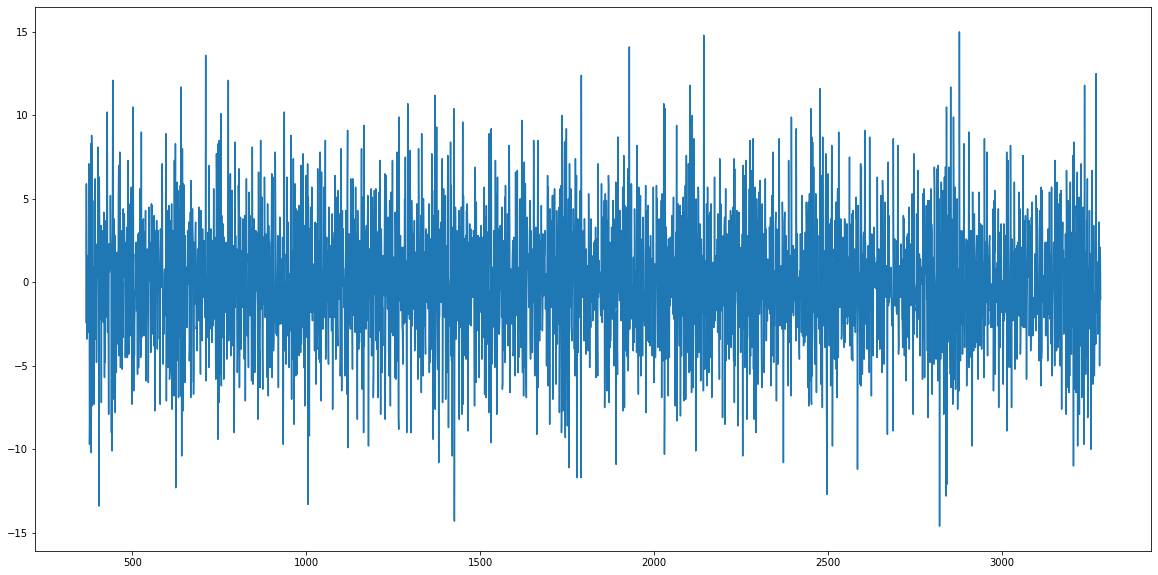

In [98]:
fig = plt.figure(figsize=(20, 10))
plt.plot(temp_diff_1_365.index, temp_diff_1_365.values)

In [99]:
temp_diff_1_365.describe()

count    2.918000e+03
mean     5.140507e-04
std      4.032485e+00
min     -1.460000e+01
25%     -2.500000e+00
50%     -4.440892e-16
75%      2.600000e+00
max      1.500000e+01
Name: Temp, dtype: float64

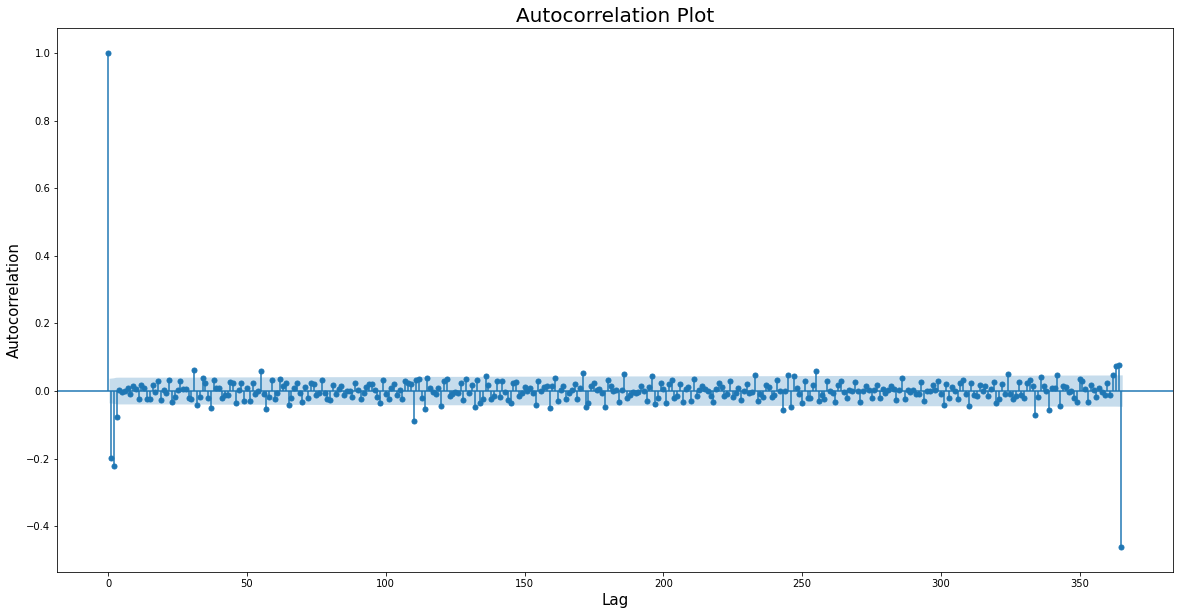

In [100]:
fig, ax = plt.subplots(figsize=(20, 10))
sm.graphics.tsa.plot_acf(temp_diff_1_365, lags=365, ax=ax)
plt.xlabel('Lag', fontsize=15)
plt.ylabel('Autocorrelation', fontsize=15)
plt.title('Autocorrelation Plot', fontsize=20)
plt.show()

# ARIMA Models

## ARIMA(2, 1, 1)

In [91]:
model = ARIMA(train_data['Temp'], order=(2, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3284
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -7566.907
Date:                Sun, 18 Jul 2021   AIC                          15141.813
Time:                        20:16:18   BIC                          15166.199
Sample:                             0   HQIC                         15150.545
                               - 3284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4075      0.016    -26.142      0.000      -0.438      -0.377
ma.L2         -0.3322      0.017    -19.172      0.000      -0.366      -0.298
ma.L3         -0.1039      0.016     -6.319      0.0

In [85]:
residuals = model_fit.resid
residuals.describe()

count    3284.000000
mean       -0.002488
std         2.444878
min        -7.405783
25%        -1.640087
50%         0.051214
75%         1.533860
max        17.900000
dtype: float64

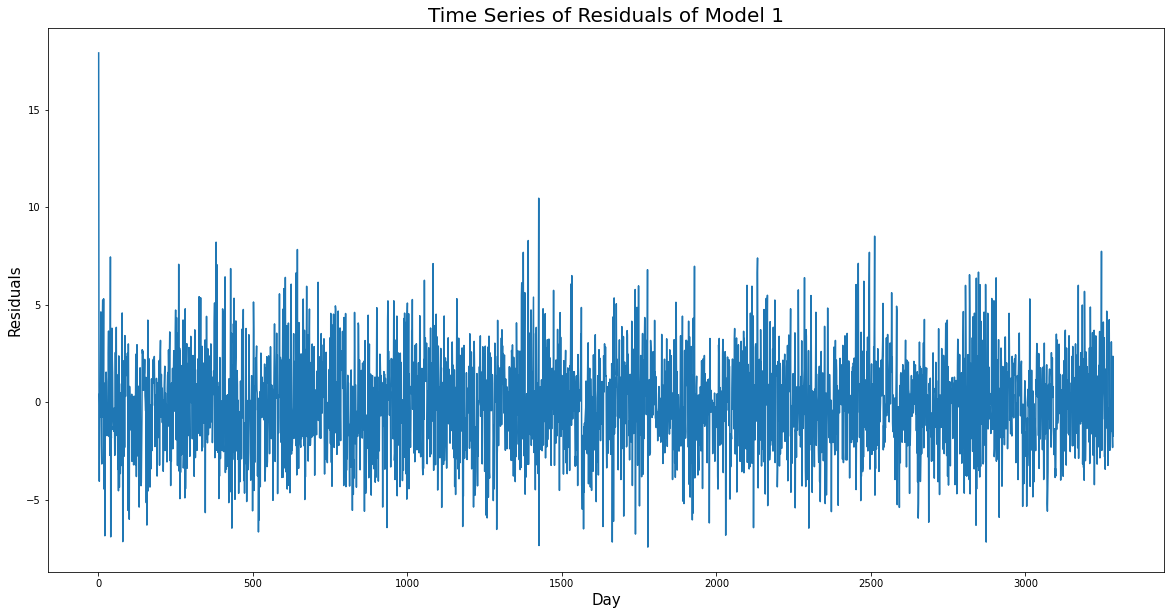

In [86]:
fig = plt.figure(figsize=(20, 10))
plt.xlabel('Day', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Time Series of Residuals of Model 1', fontsize=20)
plt.plot(residuals.index, residuals)

Text(0.5, 1.0, 'Autocorrelation Plot of Residuals of Model 1')

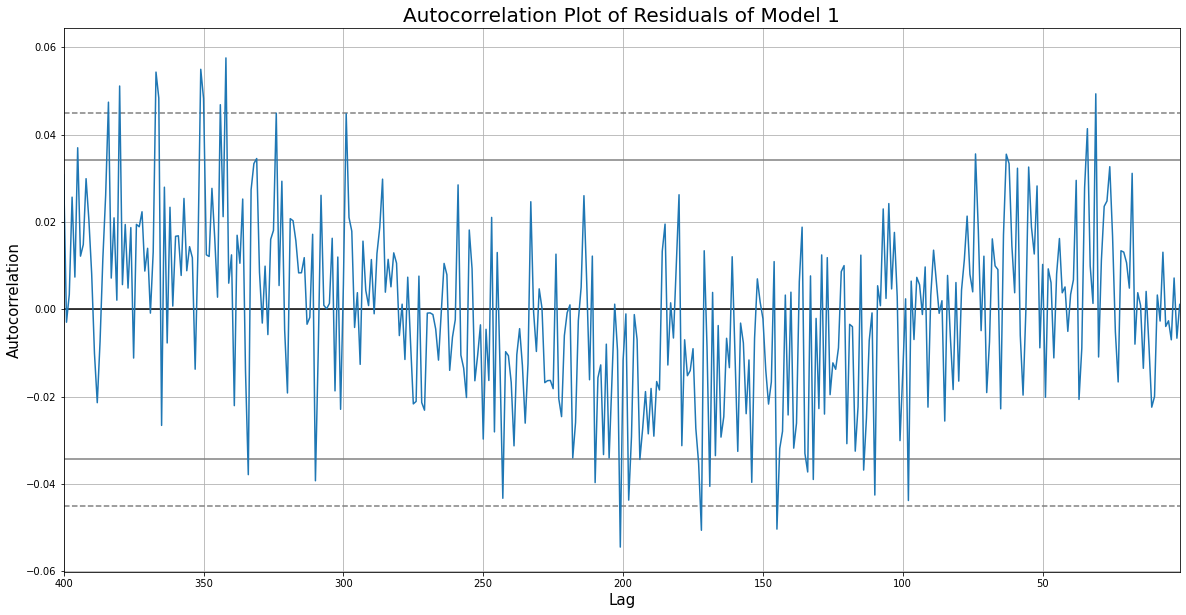

In [87]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(400)
autocorrelation_plot(residuals, ax=ax)
plt.xlabel('Lag', fontsize=15)
plt.ylabel('Autocorrelation', fontsize=15)
plt.title('Autocorrelation Plot of Residuals of Model 1', fontsize=20)

In [88]:
sm.stats.diagnostic.acorr_breusch_godfrey(model_fit, nlags=365)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 3284

## ARIMA(19, 1, 0)

In [202]:
model = ARIMA(train_data['Temp'], order=(19, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Temp   No. Observations:                 3283
Model:                ARIMA(19, 1, 0)   Log Likelihood               -7563.395
Method:                       css-mle   S.D. of innovations              2.422
Date:                Sun, 18 Jul 2021   AIC                          15168.790
Time:                        15:41:47   BIC                          15296.817
Sample:                             1   HQIC                         15214.630
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0014      0.008     -0.182      0.856      -0.017       0.014
ar.L1.D.Temp     -0.4050      0.017    -23.224      0.000      -0.439      -0.371
ar.L2.D.Temp     -0.4921      0.019    -

In [207]:
# Save the model
model_fit.save('Arima(19, 1, 0).pkl')

In [188]:
residuals = model_fit.resid
residuals.describe()

count    3283.000000
mean        0.000569
std         2.423010
min        -7.645067
25%        -1.612864
50%         0.059021
75%         1.562523
max        10.216231
dtype: float64

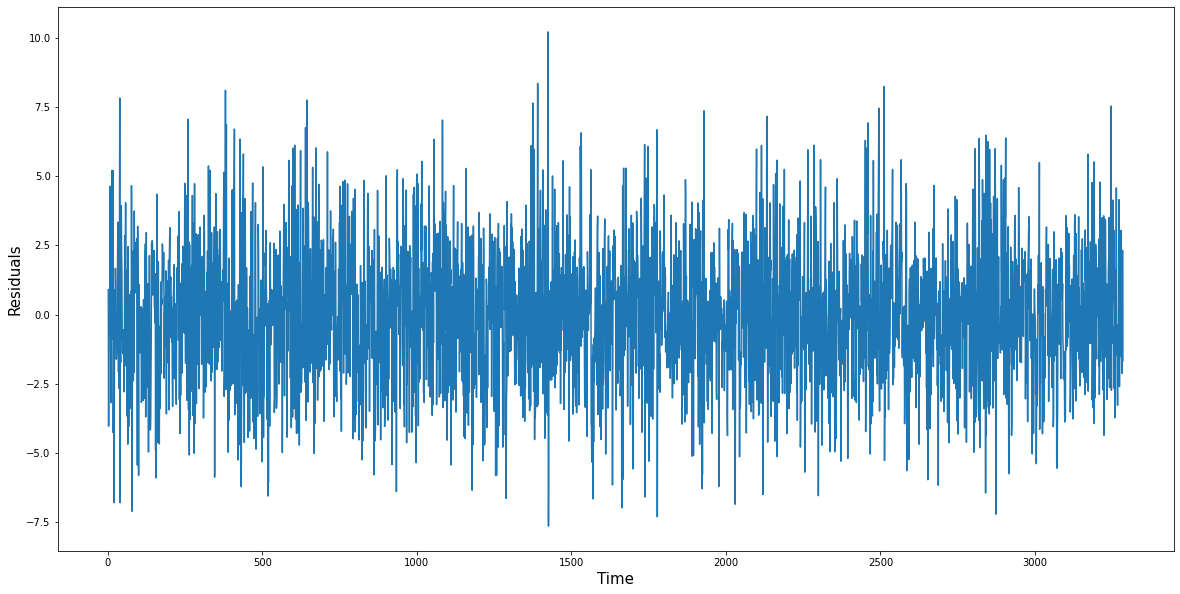

In [189]:
fig = plt.figure(figsize=(20, 10))
plt.xlabel('Day', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Time Series of Residuals of Model 1', fontsize=20)
plt.plot(residuals.index, residuals)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

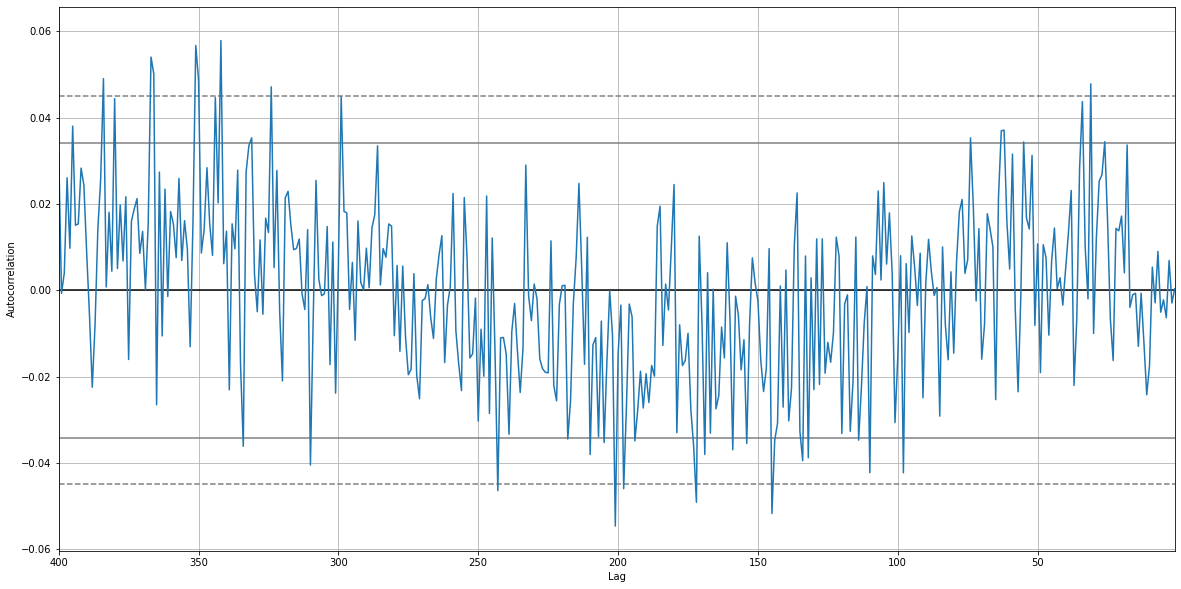

In [203]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(400)
autocorrelation_plot(residuals, ax=ax)

In [204]:
sm.stats.diagnostic.acorr_breusch_godfrey(model_fit, nlags=365)

(405.8591582432059, 0.06894268748978, 1.127347465988923, 0.05815220243694887)

## SARIMA Models

# Out-of-sample Forecast

The code snippet below allows to save and load trained models. Source: https://machinelearningmastery.com/save-arima-time-series-forecasting-model-python/

In [97]:
def __getnewargs__(self):
    return ((self.endog), (self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__

## Rolling-Window Forecast

In [148]:
forecasts = []
train_series = train_data['Temp']
test_series = test_data['Temp']
for t in range(365):
    model = ARIMA(train_series, order=(2, 1, 1))
    model_fit = model.fit()
    forecasts.append(model_fit.forecast()[0].item())
    train_series = train_series.append(pd.Series(test_series.iloc[t]), ignore_index=True)

In [149]:
forecasts

[12.893104331394843,
 14.331619348129628,
 13.22575454032446,
 14.78373886627254,
 13.92575547177088,
 13.999588224706384,
 14.646848545521435,
 15.239908825933536,
 14.268018213626151,
 16.061461308274584,
 16.704300792076744,
 18.705230334514447,
 16.791066851186834,
 15.309678210080717,
 15.94053981319602,
 15.233774086145292,
 12.93334491827244,
 13.68045323523826,
 15.451136745366869,
 14.675726058074739,
 14.71964178561045,
 13.983452060851828,
 14.658754634159102,
 14.499416752916225,
 18.16784904951572,
 14.36237638405729,
 16.347279195907117,
 16.04581936547541,
 16.154012610119448,
 14.267817817548138,
 16.26633461539209,
 15.759624371088043,
 13.396809345331299,
 13.877626893233519,
 15.231266131413912,
 14.870559142427371,
 14.625764999018372,
 13.761787434143427,
 14.156498018372032,
 15.504180948894394,
 15.355443402117245,
 16.294309677897065,
 15.051522359063043,
 14.993325842354011,
 13.879850795739722,
 14.690416473307257,
 16.39676847559468,
 15.143333428305972,
 17.

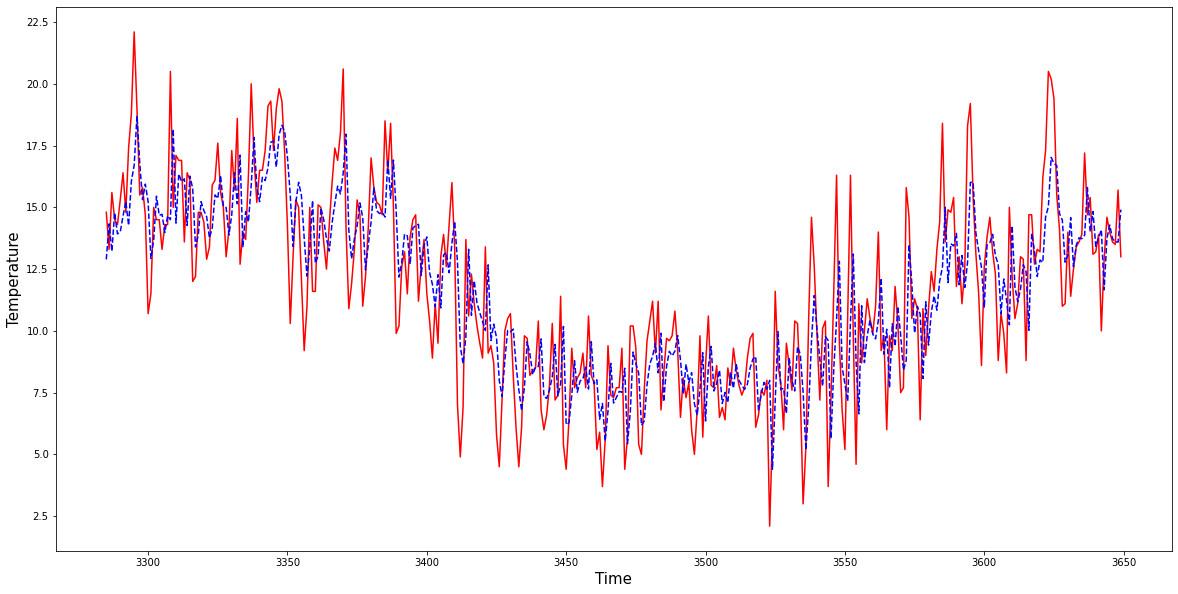

In [150]:
fig = plt.figure(figsize=(20, 10))
plt.xlabel('Time', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.plot(test_series.index, test_series.values, c='red', ls='-')
plt.plot(test_series.index, forecasts, c='blue', ls='--')

In [155]:
forecast_errors = test_series.values - forecasts
forecast_errors

array([ 1.90689567e+00, -1.03161935e+00,  2.37424546e+00, -2.83738866e-01,
        3.74244528e-01,  1.30041178e+00,  1.75315145e+00, -4.39908826e-01,
        3.13198179e+00,  2.73853869e+00,  5.39569921e+00,  2.94769665e-01,
       -1.29106685e+00,  4.90321790e-01, -1.24053981e+00, -4.53377409e+00,
       -1.43334492e+00,  1.31954676e+00, -9.51136745e-01, -1.75726058e-01,
       -1.41964179e+00,  3.16547939e-01, -3.58754634e-01,  6.00058325e+00,
       -3.16784905e+00,  2.73762362e+00,  5.52720804e-01,  8.54180635e-01,
       -2.55401261e+00,  2.13218218e+00, -1.66334615e-01, -3.75962437e+00,
       -1.19680935e+00,  9.22373107e-01, -4.31266131e-01, -4.70559142e-01,
       -1.72576500e+00, -3.61787434e-01,  1.74350198e+00,  5.95819051e-01,
        2.24455660e+00, -6.94309678e-01, -5.15223591e-02, -1.99332584e+00,
        2.20149204e-01,  2.60958353e+00, -6.96768476e-01,  3.45666657e+00,
       -4.41430709e+00,  5.92097951e-01, -1.12693847e+00,  1.89081302e+00,
        4.08401123e+00, -

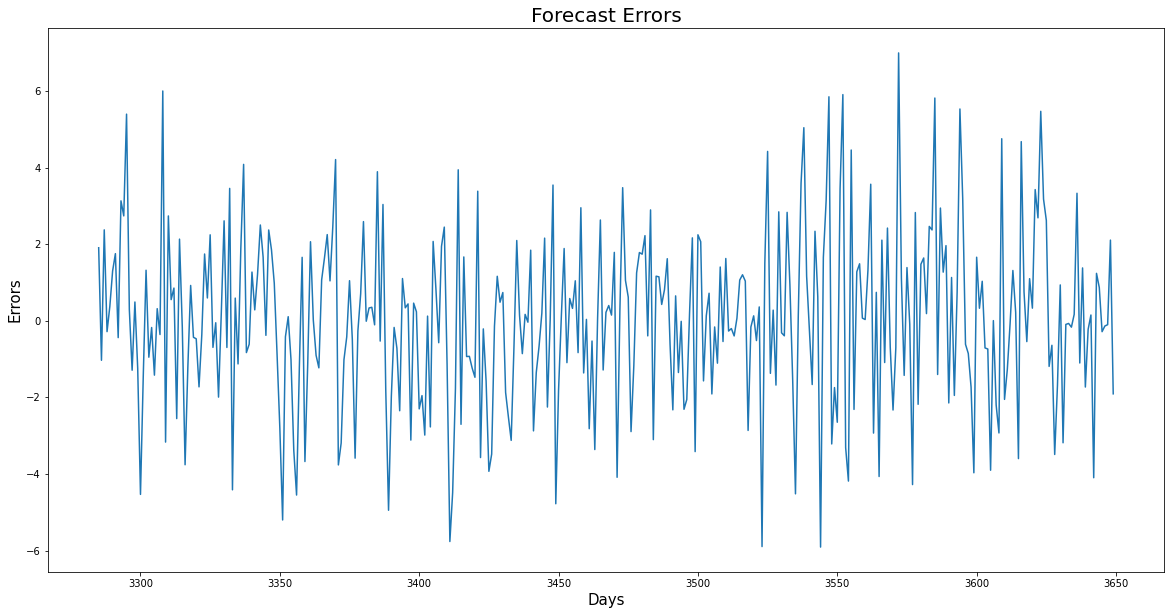

In [206]:
fig = plt.figure(figsize=(20, 10))
plt.xlabel('Days', fontsize=15)
plt.ylabel('Errors', fontsize=15)
plt.title('Forecast Errors', fontsize=20)
plt.plot(test_series.index, forecast_errors)

In [166]:
print('Mean error is ', np.mean(forecast_errors))
print('Mean absolute error is ', np.mean(np.abs(forecast_errors)))
print('Mean squared error is ', np.mean(forecast_errors ** 2))
print('Root mean squared error is ', np.sqrt(np.mean(forecast_errors ** 2)))

Mean error is  0.017028413155073932
Mean absolute error is  1.7467199696002518
Mean squared error is  5.122671532520202
Root mean squared error is  2.2633319536736547


## Multi-Step Forecast

In [212]:
# Load the trained ARIMA(19, 1, 0) model
model_fit = ARIMAResults.load('ARIMA(19, 1, 0).pkl')

In [215]:
model_fit.forecast()[0].item()

12.713885142540217

In [ ]:
forecasts = []
for t in in range(365):
    forecast = model_fit.forecast()[0].item()
    

In [216]:
model_fit.append(model_fit.forecast()[0].item())

AttributeError: 'ARIMAResults' object has no attribute 'append'